# Data ingestion and visualization

Name: Holden Alpern

Date: 09/09/2024

### In this lab we will get started understanding the data products we will use in our projects. We will do some basic preprocessing and save new datasets for use in our later work

All the tasks in this lab are:

* Trim BedMachine to an area around your ice shelf - 1 pt
* Make a figure with multiple subplots showing the bed, surface, thickness and mask - 1 pt
* Coarsen your data with a block reduction - 2 pts
* Remake the previous figure with the coarsened data - 1 pt
* Make a figure of the water column thickness underneath your ice shelf - 1 pt
* Make a figure of the whole bed of Antarctica on a coarsened grid and highlight the bed below sea level - 1 pt
* Identify all the gravity data near your ice shelf, ingest them separately, and plot them all on the same plot - 1 pt
* Combine your datasets, trim your data to your BedMachine region with padding, and make a figure - 1 pt
* Finalize datasets: remove missing values, rename columns, drop unnecessary columns, and save new gravity dataset to a csv. Save your trimmed and coarsened BedMachine dataset to a NetCDF - 1 pt

Total: 10 pts

You can use multiple cells for you problem. Printing things and examining your data are encouraged. Commenting your code is encouraged. Be sure to include titles, axes labels, and colorbar labels on figures.

## Part 1: BedMachine

BedMachine is a continent-wide gridded Antarctic data product that includes bed elevation, surface elevation, and a few other important things.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import verde as vd

Let's open BedMachine. Note that this is loading the data *lazily*, meaning that it is not putting the entire dataset into the computer's RAM. This is advantageous because BedMachine is a lot of data and if we know we want to work with a small area we can get there without loading the whole thing. Conversely, `xr.load_dataset` would load the whole thing in memory.

**Why xarray?**

`xarray` is useful for geospatial problems because it is designed for multidimensional arrays with metadata and coordinates. When you manipulate xarray objects the coordinates are persisted and associated with the data. This makes it easy to trim data to a certain region using the actual coordinates rather than ambiguous indices. The naming of coordinates and variables makes xarray akin the multidimensional version of `pandas`.

In [2]:
bm = xr.open_dataset('BedMachineAntarctica-v3.nc')

In code cells if you put a named variable as the last thing in the cell Jupyter will try to print it or stylize it for you. This is really useful for quickly inspecting variables you are creating or doing sanity checks. I often check the shape of numpy arrays at the end of cells. Below we can see that Jupyter will give us a nice overview of the xarray object.

In [3]:
bm

<xarray.Dataset> Size: 4GB
Dimensions:    (x: 13333, y: 13333)
Coordinates:
  * x          (x) int32 53kB -3333000 -3332500 -3332000 ... 3332500 3333000
  * y          (y) int32 53kB 3333000 3332500 3332000 ... -3332500 -3333000
Data variables:
    mapping    |S1 1B ...
    mask       (y, x) int8 178MB ...
    firn       (y, x) float32 711MB ...
    surface    (y, x) float32 711MB ...
    thickness  (y, x) float32 711MB ...
    bed        (y, x) float32 711MB ...
    errbed     (y, x) float32 711MB ...
    source     (y, x) int8 178MB ...
    dataid     (y, x) int8 178MB ...
    geoid      (y, x) int16 356MB ...
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     03-Jun-2022 (v3.4)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spacing:                     500
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2019), Deep glacial tr...
    Notes:                       Data processed at the Department of Earth Sy...

Let's look at some ways we can access features of the `xarray.Dataset`

In [4]:
list(bm.dims)

['x', 'y']

In [5]:
list(bm.variables)

['mapping',
 'x',
 'y',
 'mask',
 'firn',
 'surface',
 'thickness',
 'bed',
 'errbed',
 'source',
 'dataid',
 'geoid']

In [6]:
bm.attrs

{'Conventions': 'CF-1.7',
 'Title': 'BedMachine Antarctica',
 'Author': 'Mathieu Morlighem',
 'version': '03-Jun-2022 (v3.4)',
 'nx': np.float64(13333.0),
 'ny': np.float64(13333.0),
 'Projection': 'Polar Stereographic South (71S,0E)',
 'proj4': '+init=epsg:3031',
 'sea_water_density (kg m-3)': np.float64(1027.0),
 'ice_density (kg m-3)': np.float64(917.0),
 'xmin': np.int32(-3333000),
 'ymax': np.int32(3333000),
 'spacing': np.int32(500),
 'no_data': np.float64(-9999.0),
 'license': 'No restrictions on access or use',
 'Data_citation': 'Morlighem M. et al., (2019), Deep glacial troughs and stabilizing ridges unveiled beneath the margins of the Antarctic ice sheet, Nature Geoscience (accepted)',
 'Notes': 'Data processed at the Department of Earth System Science, University of California, Irvine'}

If you access the data variables, an `xarray.DataArray` is returned. Sometimes this is good for doing more `xarray` manipulation but often times we just want the data as a numpy array to crunch. You can get the numpy array using `.values` or `.data` (only for multidemsional)

In [7]:
bm.bed

<xarray.DataArray 'bed' (y: 13333, x: 13333)> Size: 711MB
[177768889 values with dtype=float32]
Coordinates:
  * x        (x) int32 53kB -3333000 -3332500 -3332000 ... 3332500 3333000
  * y        (y) int32 53kB 3333000 3332500 3332000 ... -3332500 -3333000
Attributes:
    long_name:      bed topography
    standard_name:  bedrock_altitude
    units:          meters
    grid_mapping:   mapping
    source:         IBCSO v2 and Mathieu Morlighem

In [8]:
bm.bed.values.shape

(13333, 13333)

## Trim BedMachine to an area around your ice shelf - 1 pt

`xarray`'s coordinates make it easy to trim to a region. Take a look at the indexing in xarray: https://docs.xarray.dev/en/latest/user-guide/indexing.html

Hint: think about doing something like `bm.sel(x= , y= )` where you have 1D masks along each dimension or a `slice` for each dimension

In [9]:
################################
##### Your work here ###########
# Four Coordinates: 73-76 Latitude, 108-135 Longitude
# Translated:
# (73,108) = (-1769169.403052, -574837.985024)
# (73,135) = (-1315370.496424, -1315370.496424)
# (76,108) = (-1453634.703959, -472314.546444)
# (76,135) = (-1001157.218018, -1004658.029598)
# xmax= -1001157.218018, xmin= -1769169.403052
# ymax= -472314.56444, ymin= -1315370.496424
# changed ymax to -700000 to remove Dotson ice shelf, trimmed rest of coords as well

# Defines bounding box coordinates
x_min = -1700000
x_max = -1100000
y_min = -1200000
y_max = -700000

# Checks the original data's bounds
print("Original x range:", bm['x'].min().values, bm['x'].max().values)
print("Original y range:", bm['y'].min().values, bm['y'].max().values)

# Creates masks for x and y coordinates
x_mask = (bm['x'] >= x_min) & (bm['x'] <= x_max)
y_mask = (bm['y'] >= y_min) & (bm['y'] <= y_max)

# Applies masks to select the data within the bounds
trimmed_data = bm.where(x_mask & y_mask, drop=True)

# Checks if the trimmed data has any points
if trimmed_data['x'].size == 0 or trimmed_data['y'].size == 0:
    print("No data found in the selected region.")
else:
    print("Data is available in the selected region.")

# Additional check to ensure y values are not empty and have valid ranges
if trimmed_data['y'].size > 0:
    print(f"Trimmed y range: {trimmed_data['y'].min().values} to {trimmed_data['y'].max().values}")
else:
    print("No valid y values found in the trimmed data.")

Original x range: -3333000 3333000
Original y range: -3333000 3333000
Data is available in the selected region.
Trimmed y range: -1200000 to -700000


## Make a figure with multiple subplots showing the bed, surface, thickness and mask - 1 pt

Be sure to have colorbars and axes labels and tick labels. Note that with subplots of maps with the same ticks and axes labels it is not necessary to have the same ticks and labels. For example if you have all the subplots in a row, it is not necessary to have the ytick labels and Y[km] on each y-axis. Note that you can suppress the repeated tick labels by setting `sharey=False` in `plt.subplots`. Adjust your region above so that there seems to be enough room around your ice shelf.

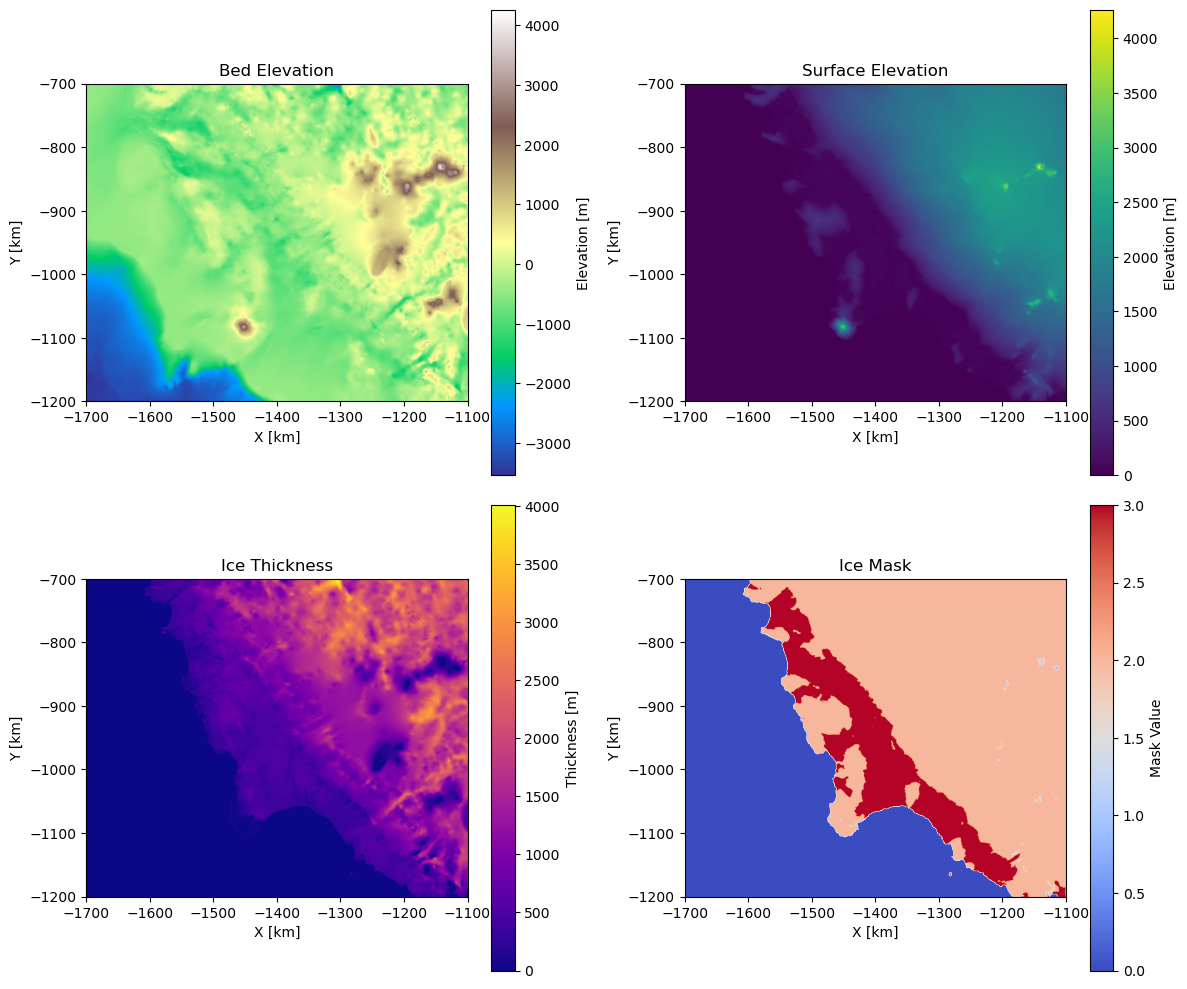

In [10]:
# Ensures there's data to plot
if trimmed_data['x'].size != 0 and trimmed_data['y'].size != 0:
    # Get the x and y coordinates in meters
    x = trimmed_data['x'].values / 1000 #converts to km
    y = trimmed_data['y'].values / 1000 #converts to km

    # Extracts the data arrays
    bed = trimmed_data['bed'].values
    surface = trimmed_data['surface'].values
    thickness = trimmed_data['thickness'].values
    mask = trimmed_data['mask'].values

    # Creates a figure and a grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plots Bed
    bed_plot = axes[0, 0].imshow(bed, cmap='terrain', extent=[x.min(), x.max(), y.min(), y.max()], origin='upper')
    axes[0, 0].set_title('Bed Elevation')
    axes[0, 0].set_xlabel('X [km]')
    axes[0, 0].set_ylabel('Y [km]')
    fig.colorbar(bed_plot, ax=axes[0, 0], orientation='vertical', label='Elevation [m]')

    # Plots Surface
    surface_plot = axes[0, 1].imshow(surface, cmap='viridis', extent=[x.min(), x.max(), y.min(), y.max()], origin='upper')
    axes[0, 1].set_title('Surface Elevation')
    axes[0, 1].set_xlabel('X [km]')
    axes[0, 1].set_ylabel('Y [km]')
    fig.colorbar(surface_plot, ax=axes[0, 1], orientation='vertical', label='Elevation [m]')

    # Plots Thickness
    thickness_plot = axes[1, 0].imshow(thickness, cmap='plasma', extent=[x.min(), x.max(), y.min(), y.max()], origin='upper')
    axes[1, 0].set_title('Ice Thickness')
    axes[1, 0].set_xlabel('X [km]')
    axes[1, 0].set_ylabel('Y [km]')
    fig.colorbar(thickness_plot, ax=axes[1, 0], orientation='vertical', label='Thickness [m]')

    # Plots Mask
    mask_plot = axes[1, 1].imshow(mask, cmap='coolwarm', extent=[x.min(), x.max(), y.min(), y.max()], origin='upper')
    axes[1, 1].set_title('Ice Mask')
    axes[1, 1].set_xlabel('X [km]')
    axes[1, 1].set_ylabel('Y [km]')
    fig.colorbar(mask_plot, ax=axes[1, 1], orientation='vertical', label='Mask Value')

    # Adjusts layout to make room for colorbars and labels
    plt.tight_layout()

    # Shows the plot
    plt.show()
else:
    print("No data available to plot.")

## Coarsen your data with a block reduction - 2 pts

The original BedMachine data is at 500 m resolution. Sometimes this can be a lot for our computers to handle and we want to run our model with a greater (coarser) resolution, e.g., 5 km. If you were to pick a value from the original data every 5 km or so that would not necessarily be representative of the data at our new resolution and would produce aliasing. Thus, we want to do a block reduction to aggregate data into our new grid. A block reduction means taking a block of the data around our new data point and taking the mean, median, or some other function of the data.

`xarray` convenientely provides a `coarsen` method for both `xarray.DataArray` and `xarray.Dataset` (https://docs.xarray.dev/en/stable/generated/xarray.Dataset.coarsen.html), however this is not great for fine control. Instead, `verde.BlockReduction` provides more fine controls like choosing an exact spacing (https://www.fatiando.org/verde/latest/api/generated/verde.BlockReduce.html)

Note: some of the variables in BedMachine are categorical, e.g., source. This means that if you do a mean block reduction across a boundary in the source variable you will end up with an invalid value. You could round to the nearest integer, but then you still might have values that don't belong. For example, if the mask has values 1 and 10 near each other you could get a new value of 5 which didn't exist at all. Instead, you can use `verde.KNeighbors` which is a wrapper of scikit-learn's K-Nearest Neighbors with *k=1* to get the nearest value or you can use a mode in the reduction. Numpy doesn't provide a mode function but `scipy` does. However, the function returns an array of the most frequent values, so I've written a wrapper for it called `mode_custom` that you can use. Using a mode versus the nearest neighbor could make important changes and these are the kinds of small decisions you make in research!

* **You need to create a new `xarray.Dataset` around your ice shelf with the categorical variables handled in some way**
* **print your new grid spacing**

In [11]:
from scipy.stats import mode

def mode_custom(a):
    vals = mode(a)
    return vals[0].squeeze()

In [12]:
# Defines the coarsening factor
# Original resolution: 500 m, target resolution: 5 km (5000 m)
coarsening_factor = 5000 // 500  # 10x10 grid cells

# Defines mode function for categorical data with axis handling
def mode_custom(array, axis):
    vals, _ = mode(array, axis=axis, nan_policy='omit')  # Handle NaNs if present
    return vals

# Coarsens continuous variables using mean reduction
continuous_vars = ['bed', 'surface', 'thickness']  # Adjust based on your dataset variables
coarsened_continuous = trimmed_data[continuous_vars].coarsen(x=coarsening_factor, y=coarsening_factor, boundary='trim').mean()

# Coarsens categorical variables using mode reduction
categorical_vars = ['mask']  # Adjust based on your dataset variables
coarsened_categorical = {}

for var in categorical_vars:
    coarsened_categorical[var] = trimmed_data[var].coarsen(x=coarsening_factor, y=coarsening_factor, boundary='trim').reduce(mode_custom)

# Combines coarsened data into a new dataset
coarsened_dataset = coarsened_continuous.assign(**coarsened_categorical)

# make sure surface is 0 in open water
coarsened_dataset['surface'] = (('y', 'x'), np.where(coarsened_dataset.mask==0, 0, coarsened_dataset.surface))

# make sure thickness is 0 in open water and at exposed rock
ocean_rock_msk = (coarsened_dataset.mask==0)^(coarsened_dataset.mask==1)
coarsened_dataset['thickness'] = (('y', 'x'), np.where(ocean_rock_msk, 0, coarsened_dataset.thickness))

# make sure bed is equal to surface minus thickness under grounded ice
coarsened_dataset['bed'] = (('y', 'x'), np.where(coarsened_dataset.mask==2, coarsened_dataset.surface-coarsened_dataset.thickness, coarsened_dataset.bed))

# make sure surface is equal to bed at exposed rock
coarsened_dataset['bed'] = (('y', 'x'), np.where(coarsened_dataset.mask==1, coarsened_dataset.surface, coarsened_dataset.bed))

# make sure bed not above ice in ice shelf
bed_above_ice_bottom = np.where(coarsened_dataset.bed > (coarsened_dataset.surface-coarsened_dataset.thickness), True, False)
coarsened_dataset['bed'] = (('y', 'x'), np.where(bed_above_ice_bottom, coarsened_dataset.surface-coarsened_dataset.thickness, coarsened_dataset.bed))

# make mask grounded ice where bed was above ice bottom
coarsened_dataset['mask'] = (('y', 'x'), np.where(bed_above_ice_bottom, 2, coarsened_dataset.mask))

# Prints new grid spacing
new_x_spacing = (trimmed_data['x'].diff('x').mean() * coarsening_factor).values
new_y_spacing = (trimmed_data['y'].diff('y').mean() * coarsening_factor).values
print(f"New grid spacing: {new_x_spacing:.0f} m (X), {new_y_spacing:.0f} m (Y)")

# Outputs the coarsened dataset (optional, just to inspect)
print(coarsened_dataset)

New grid spacing: 5000 m (X), -5000 m (Y)
<xarray.Dataset> Size: 242kB
Dimensions:    (y: 100, x: 120)
Coordinates:
  * x          (x) float64 960B -1.698e+06 -1.693e+06 ... -1.108e+06 -1.103e+06
  * y          (y) float64 800B -7.022e+05 -7.072e+05 ... -1.192e+06 -1.197e+06
Data variables:
    bed        (y, x) float32 48kB -461.7 -470.8 -479.3 ... -657.6 -552.2 -237.2
    surface    (y, x) float32 48kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 44.66 54.78 41.26
    thickness  (y, x) float32 48kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 483.6 512.4 267.1
    mask       (y, x) float64 96kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 3.0 3.0 3.0
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     03-Jun-2022 (v3.4)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spac

## Remake the previous figure with the coarsened data - 1 pt

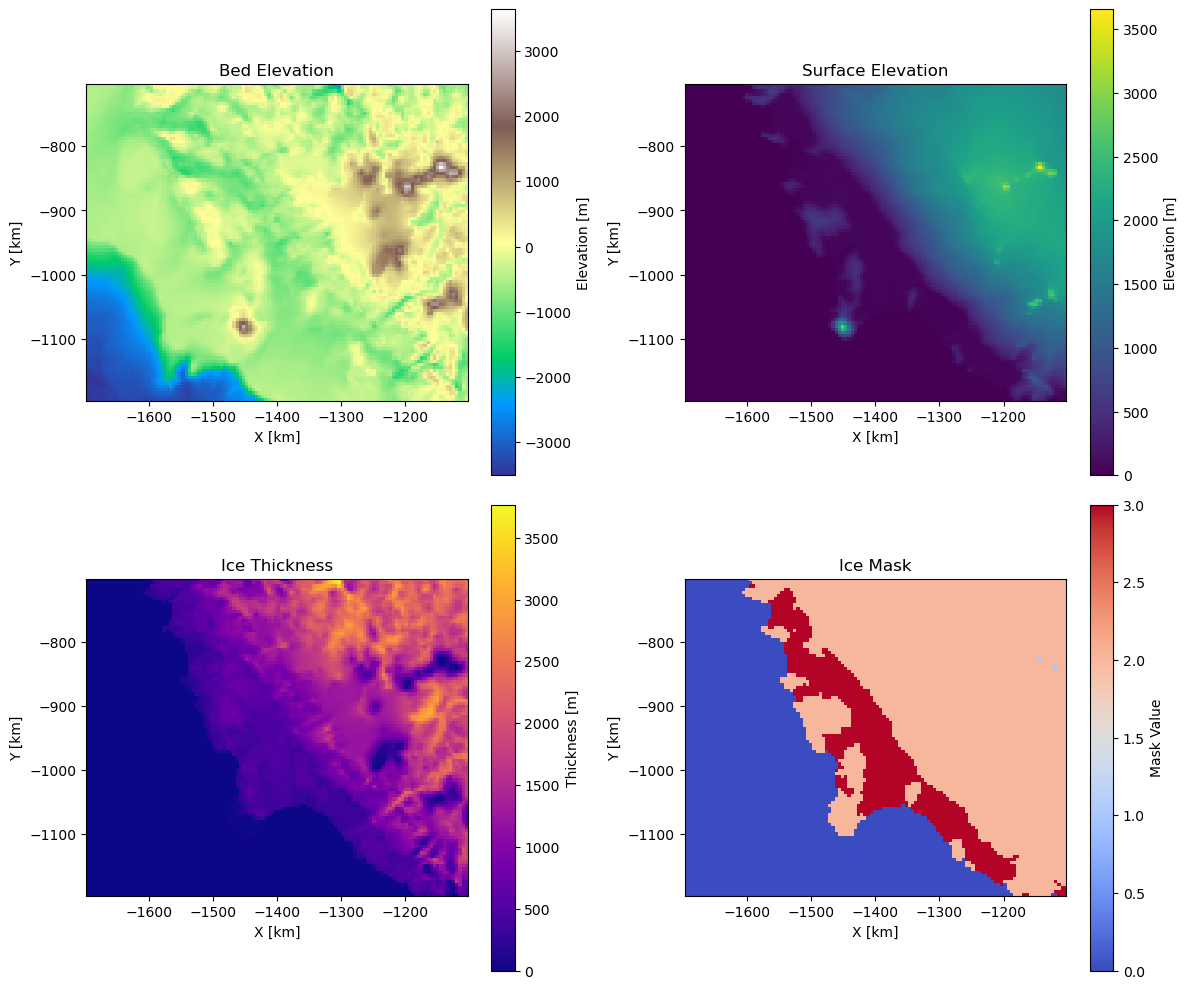

In [85]:
################################
##### Your work here ###########

# Ensures there's coarsened data to plot
if coarsened_dataset['x'].size != 0 and coarsened_dataset['y'].size != 0:
    # Convert the coarsened x and y coordinates to kilometers
    x = coarsened_dataset['x'].values / 1000  # Convert x to kilometers
    y = coarsened_dataset['y'].values / 1000  # Convert y to kilometers

    # Extracts the coarsened data arrays
    bed = coarsened_dataset['bed'].values
    surface = coarsened_dataset['surface'].values
    thickness = coarsened_dataset['thickness'].values
    mask = coarsened_dataset['mask'].values

    # Creates a figure and a grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plots Bed
    bed_plot = axes[0, 0].imshow(bed, cmap='terrain', extent=[x.min(), x.max(), y.min(), y.max()], origin='upper')
    axes[0, 0].set_title('Bed Elevation')
    axes[0, 0].set_xlabel('X [km]')
    axes[0, 0].set_ylabel('Y [km]')
    fig.colorbar(bed_plot, ax=axes[0, 0], orientation='vertical', label='Elevation [m]')

    # Plots Surface
    surface_plot = axes[0, 1].imshow(surface, cmap='viridis', extent=[x.min(), x.max(), y.min(), y.max()], origin='upper')
    axes[0, 1].set_title('Surface Elevation')
    axes[0, 1].set_xlabel('X [km]')
    axes[0, 1].set_ylabel('Y [km]')
    fig.colorbar(surface_plot, ax=axes[0, 1], orientation='vertical', label='Elevation [m]')

    # Plots Thickness
    thickness_plot = axes[1, 0].imshow(thickness, cmap='plasma', extent=[x.min(), x.max(), y.min(), y.max()], origin='upper')
    axes[1, 0].set_title('Ice Thickness')
    axes[1, 0].set_xlabel('X [km]')
    axes[1, 0].set_ylabel('Y [km]')
    fig.colorbar(thickness_plot, ax=axes[1, 0], orientation='vertical', label='Thickness [m]')

    # Plots Mask
    mask_plot = axes[1, 1].imshow(mask, cmap='coolwarm', extent=[x.min(), x.max(), y.min(), y.max()], origin='upper')
    axes[1, 1].set_title('Ice Mask')
    axes[1, 1].set_xlabel('X [km]')
    axes[1, 1].set_ylabel('Y [km]')
    fig.colorbar(mask_plot, ax=axes[1, 1], orientation='vertical', label='Mask Value')

    # Adjusts layout to make room for colorbars and labels
    plt.tight_layout()

    # Shows the plot
    plt.show()
else:
    print("No data available to plot.")


## Make a figure of the water column thickness underneath your ice shelf - 1 pt

This is important because it can show us how much room water has to move towards the grounding line in sub-ice-shelf cavities.

Think about how to can use the surface, thickness, and mask to get this. Only show this data for the ice shelf, not open water.

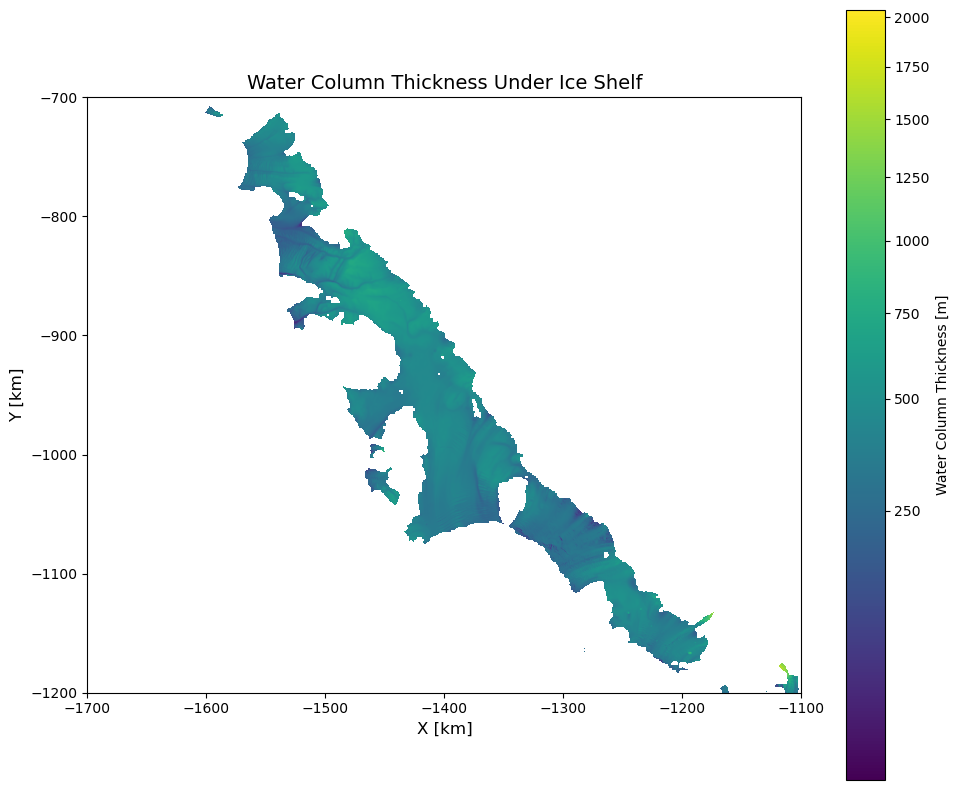

In [13]:
################################
##### Your work here ###########
from matplotlib.colors import PowerNorm

wc_thickness = np.where(mask == 3, - (surface - thickness), np.nan)

# Converts to kilos
x_km = x
y_km = y

# Creates the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Uses PowerNorm to enhance contrast, focusing on most of the data range
wc_plot = ax.imshow(wc_thickness, cmap='viridis', norm=PowerNorm(gamma=0.5), extent=[x_km.min(), x_km.max(), y_km.min(), y_km.max()], origin='upper')

# Adds titles, labels, and colorbar
ax.set_title('Water Column Thickness Under Ice Shelf', fontsize=14)
ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)

# Adds colorbar
cbar = plt.colorbar(wc_plot, ax=ax, orientation='vertical', label='Water Column Thickness [m]')

# Adjusts layout and show the plot
plt.tight_layout()
plt.show()

## Make a figure of the whole bed of Antarctica on a coarsened grid and highlight the bed below sea level - 1 pt

Make a new coarsened grid of all of Antarctica with a new variable name. We are only going to plot the bed so it is okay if you disregard the other data and only coarsen the bed `xarray.DataArray`. Make it much coarser than the original 500 m resolution because this is a ton of data! We want to highlight how much of the bed in West Antarctica is below sea level. You can do this with a diverging colormap centered around 0: https://matplotlib.org/stable/users/explain/colors/colormaps.html

Hint: the `xarray.DataArray.coarsen()` function is useful for a quick reduction

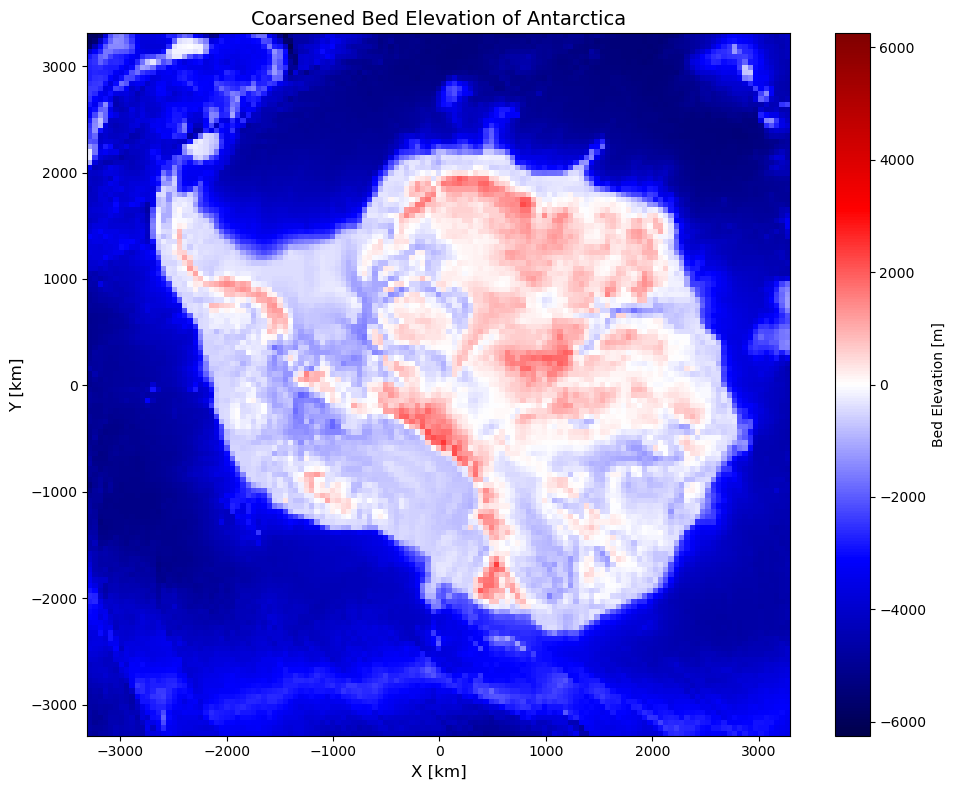

In [14]:
# Coarsening factor (50 km, for example)
coarsening_factor = 50000 // 500  # Coarsening factor for 50 km grid cells

# Coarsens only the bed variable
coarsened_bed = bm['bed'].coarsen(x=coarsening_factor, y=coarsening_factor, boundary='trim').mean()

# Converts coordinates to kilometers (optional)
x = coarsened_bed['x'].values / 1000
y = coarsened_bed['y'].values / 1000

# Calculates the maximum absolute value for the diverging colormap
max_abs_value = np.abs(coarsened_bed).max()

# Creates a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plots the coarsened bed elevation with a diverging colormap centered on zero
bed_plot = ax.imshow(coarsened_bed, cmap='seismic', extent=[x.min(), x.max(), y.min(), y.max()],
                     origin='upper', vmin=-max_abs_value, vmax=max_abs_value)

# Adds title, labels, and colorbar
ax.set_title('Coarsened Bed Elevation of Antarctica', fontsize=14)
ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)

# Adds colorbar to highlight regions above and below sea level
cbar = plt.colorbar(bed_plot, ax=ax, orientation='vertical', label='Bed Elevation [m]')

# Adjusts layout and show the plot
plt.tight_layout()
plt.show()

# Part 2: Gravity Data

## Identify all the gravity data near your ice shelf, ingest them separately, and plot them all on the same plot - 1 pt

If you are dealing with line data then you want to do a scatter plot. If your data is already gridded then you want to use pcolormesh. Plot the gravity data in their full extent.

Looking for folder: /Users/holden/Desktop/Ice Shits/cryo_share copy/OIB_Sander
OIB Sander folder found!


  0%|          | 0/155 [00:00<?, ?it/s]

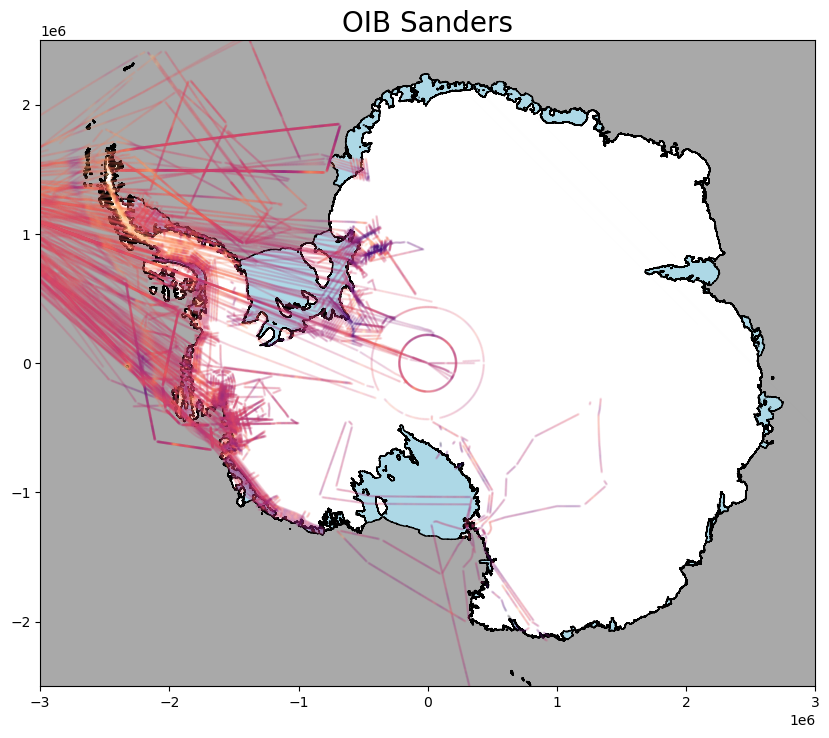

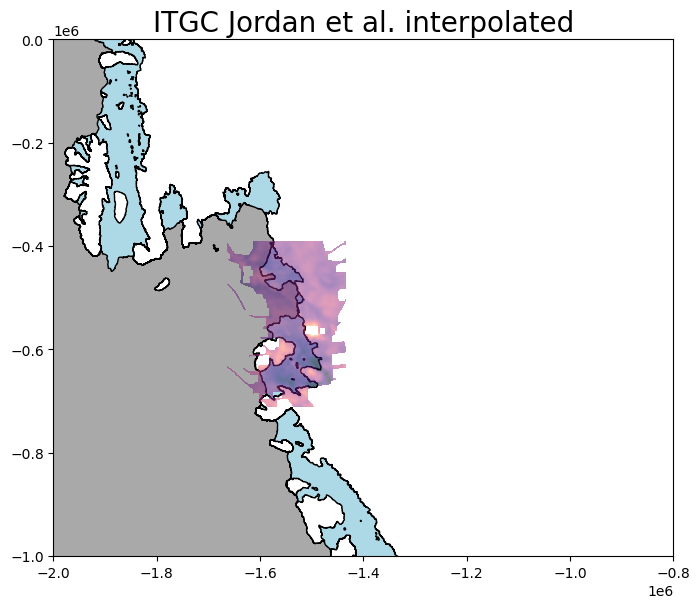

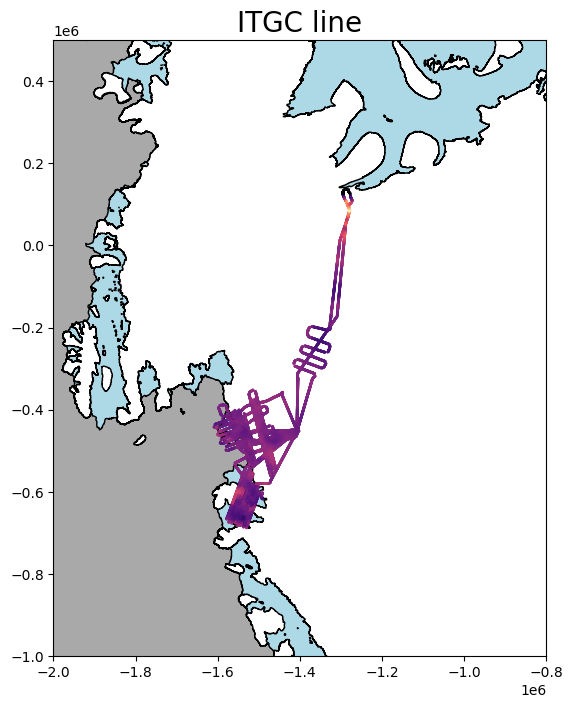

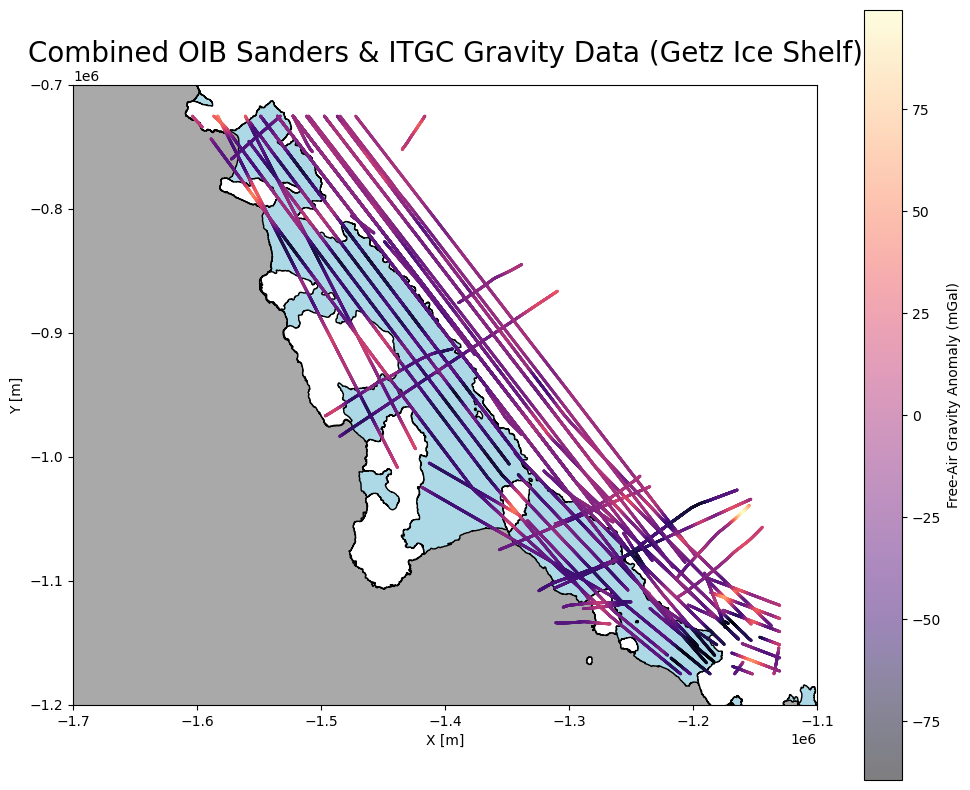

In [88]:
#imports
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import geopandas as gpd
from pyproj import CRS, Transformer
from tqdm.auto import tqdm
import time
from pathlib import Path

# Path stuff

# Corrected path
data_folder = Path("/Users/holden/Desktop/Ice Shits/cryo_share copy/OIB_Sander")
print(f"Looking for folder: {data_folder.resolve()}")

# Checks if the folder exists
if data_folder.exists():
    print("OIB Sander folder found!")
else:
    print("OIB Sander folder not found.")


# OIB Sander

# gets number of OIB folders for tqdm
num_folders = 0
for folder in os.scandir('/Users/holden/Desktop/Ice Shits/cryo_share copy/OIB_Sander'):
    num_folders += 1

# iterates through folders and ingest data
tables = []
for folder in tqdm(os.scandir('/Users/holden/Desktop/Ice Shits/cryo_share copy/OIB_Sander'), total=num_folders):
    for item in os.scandir(folder.path):
        if item.name.endswith('.txt'):
            tmp = pd.read_table(item.path, header=69, sep='\s+')
            header = tmp.columns[1:]
            tmp = tmp.drop(columns=['FLTENVIRO'])
            tmp.columns = header
            tables.append(tmp)

oib = pd.concat(tables, axis=0)
oib

oib = oib[['LAT', 'LONG', 'PSX', 'PSY', 'FAG070', 'FAG100', 'FAG140', 'FLTENVIRO', 'WGSHGT']]
oib.columns = ['lat', 'lon', 'x', 'y', 'faa70', 'faa100', 'faa140', 'flag', 'height']
oib = oib[oib.flag == 0]
oib = oib.drop(columns=['flag']).reset_index(drop=True)
oib

# Path to the "moa" folder
moa_path = Path("/Users/holden/Desktop/Ice Shits/cryo_share copy/moa")

# Loads the shapefiles from the correct path
moa_coast = gpd.read_file(moa_path / "coastlines/moa2014_coastline_v01.shp")
moa_gl = gpd.read_file(moa_path / "coastlines/moa2014_grounding_line_v01.shp")
moa_islands = gpd.read_file(moa_path / "coastlines/moa2014_islands_v01.shp")

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_facecolor('darkgray')
moa_coast.plot(facecolor='lightblue', edgecolor='k', ax=ax)
moa_gl.plot(facecolor='white', edgecolor='k', ax=ax)
moa_islands.plot(facecolor='white', edgecolor='k', ax=ax)
ax.scatter(oib.x[::100], oib.y[::100], c=oib.faa140[::100], s=1, cmap='magma', alpha=0.1)
ax.axis('scaled')
ax.set_xlim([-3e6, 3e6])
ax.set_ylim([-2.5e6, 2.5e6])
ax.set_title('OIB Sanders', fontsize=20)
plt.show()

# Code for ITGC

# Corrects the path to where the ITGC file is located
itgc_path = Path("/Users/holden/Desktop/Ice Shits/cryo_share copy/ITGC/Jordan_et_al_2020_Thw_FAA_compilation.nc")

# Loads the dataset
itgc = xr.load_dataset(itgc_path)
itgc

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.set_facecolor('darkgray')
moa_coast.plot(facecolor='lightblue', edgecolor='k', ax=ax)
moa_gl.plot(facecolor='white', edgecolor='k', ax=ax)
moa_islands.plot(facecolor='white', edgecolor='k', ax=ax)
ax.pcolormesh(itgc.x, itgc.y, itgc.gravity, cmap='magma', alpha=0.5)
ax.axis('scaled')
ax.set_xlim([-2.0e6, -0.8e6])
ax.set_ylim([-1e6, 0e6])
ax.set_title('ITGC Jordan et al. interpolated', fontsize=20)
plt.show()

itgc2 = pd.read_table(Path("/Users/holden/Desktop/Ice Shits/cryo_share copy/ITGC/Thw_tera_pos_grav_share.XYZ"), header=5, sep=',', na_values=['*'])
itgc2 = itgc2[['Lat_deg', 'Lon_deg', 'x', 'y', 'FAA_spl_2_ICEBRIDGE', 'Hght_GRS80']]
itgc2.columns = ['lat', 'lon', 'x', 'y', 'faa', 'height']
itgc2 = itgc2.dropna().reset_index(drop=True)
itgc2

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.set_facecolor('darkgray')
moa_coast.plot(facecolor='lightblue', edgecolor='k', ax=ax)
moa_gl.plot(facecolor='white', edgecolor='k', ax=ax)
moa_islands.plot(facecolor='white', edgecolor='k', ax=ax)
ax.scatter(itgc2.x, itgc2.y, c=itgc2.faa, s=1, cmap='magma', alpha=0.1)
ax.axis('scaled')
ax.set_xlim([-2.0e6, -0.8e6])
ax.set_ylim([-1e6, 0.5e6])
ax.set_title('ITGC line', fontsize=20)
plt.show()

padding_percent = 0.05

# Calculate padding for the x and y ranges
x_padding = (x_max - x_min) * padding_percent
y_padding = (y_max - y_min) * padding_percent

# Adjust the bounds for the gravity data (add padding)
x_min_padded = x_min + x_padding
x_max_padded = x_max - x_padding
y_min_padded = y_min + y_padding
y_max_padded = y_max - y_padding

# Filters OIB Sanders and ITGC data within the padded bounds
oib_trimmed = oib[(oib['x'] >= x_min_padded) & (oib['x'] <= x_max_padded) & (oib['y'] >= y_min_padded) & (oib['y'] <= y_max_padded)]
itgc_trimmed = itgc2[(itgc2['x'] >= x_min_padded) & (itgc2['x'] <= x_max_padded) & (itgc2['y'] >= y_min_padded) & (itgc2['y'] <= y_max_padded)]

# Combines the trimmed datasets, including 'x', 'y', 'faa', and 'height'
# Ensures that 'height' is carried over from both datasets
gravity_trimmed = pd.concat(
    [
        oib_trimmed[['x', 'y', 'faa140', 'height']],  # From OIB
        itgc_trimmed[['x', 'y', 'faa', 'height']].rename(columns={'faa': 'faa140'})  # From ITGC
    ], 
    axis=0
)

# Plots the combined data as scatter
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_facecolor('darkgray')

# Plots the MOA background data
moa_coast.plot(facecolor='lightblue', edgecolor='k', ax=ax)
moa_gl.plot(facecolor='white', edgecolor='k', ax=ax)
moa_islands.plot(facecolor='white', edgecolor='k', ax=ax)

# Scatters plot of OIB and ITGC combined gravity data, only within the bounds of Getz Ice Shelf
sc = ax.scatter(gravity_trimmed['x'], gravity_trimmed['y'], c=gravity_trimmed['faa140'], s=1, cmap='magma', alpha=0.5)

# Sets the x and y limits to the specified bounds for the Getz Ice Shelf
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

# Adds a colorbar
plt.colorbar(sc, ax=ax, label='Free-Air Gravity Anomaly (mGal)')

# Adds title and labels
ax.set_title('Combined OIB Sanders & ITGC Gravity Data (Getz Ice Shelf)', fontsize=20)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')

plt.show()

## Combine your datasets, trim your data to your BedMachine region with padding, and make a figure - 1 pt

To prevent edge effects we want to pad the gravity data inside of the BedMachine data. Make a figure with two subplots: one of your gravity data (free air anomaly or free air gravity) overlain on the BedMachine bed and one of the gravity measurement height overlain on the BedMachine surface. You might want to experiment with transparency (using the `alpha` argument) or colormaps to find a visual that shows the correlation between the free air anomaly and the bed without being "too much" to look at.

Note: if you have multiple datasets near your ice shelf you should combine them into a single one now. This can usually be done by renaming all the columns to the same thing, dropping other columns, and concatenating the tables. If you have a ton of gravity data you can downsample it for your figure.

Index(['x', 'y', 'faa140', 'height'], dtype='object')


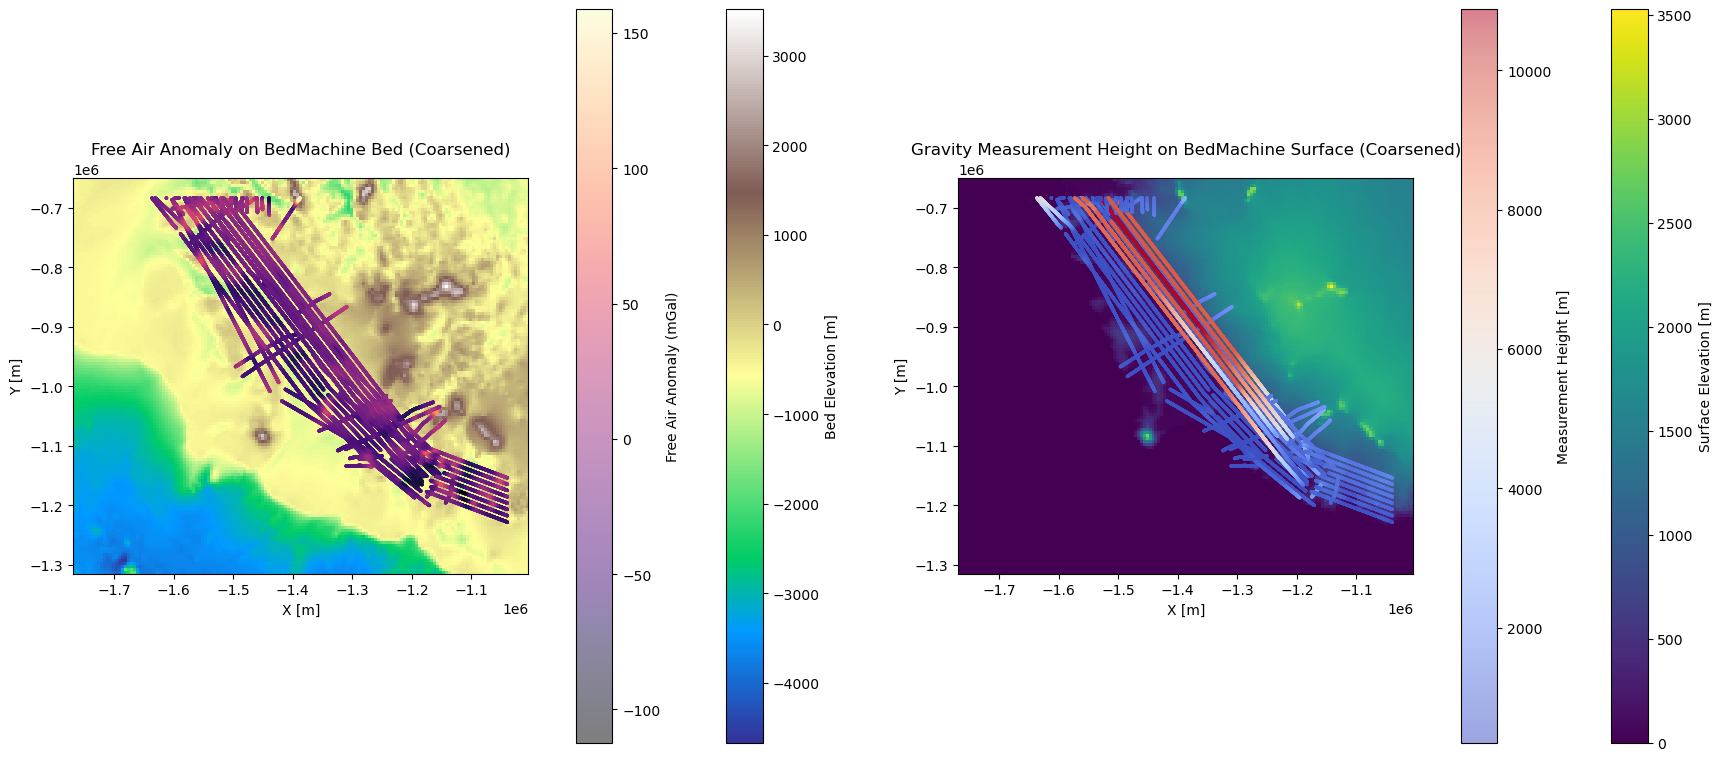

In [70]:
# Create meshgrid for coarsened dataset
x_bm, y_bm = np.meshgrid(coarsened_dataset['x'].values, coarsened_dataset['y'].values)

print(gravity_trimmed.columns)

if 'faa140' in gravity_trimmed.columns:
    # Proceed with plotting
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # Increased figure size for larger plots

    # Plot 1: Free Air Anomaly on Bed Elevation (using coarsened BedMachine dataset)
    bed_plot = axes[0].pcolormesh(x_bm, y_bm, coarsened_dataset['bed'].values, cmap='terrain', shading='auto')
    axes[0].set_title('Free Air Anomaly on BedMachine Bed (Coarsened)')
    axes[0].set_xlabel('X [m]')
    axes[0].set_ylabel('Y [m]')
    axes[0].set_aspect('equal')  # Ensure the aspect ratio is equal

    # Adjusts colorbar size and placement
    cbar1 = plt.colorbar(bed_plot, ax=axes[0], label='Bed Elevation [m]', shrink=0.8, pad=0.08)

    # Overlays the gravity free air anomaly data (scatter plot)
    sc1 = axes[0].scatter(gravity_trimmed['x'], gravity_trimmed['y'], c=gravity_trimmed['faa140'], cmap='magma', alpha=0.5, s=2)
    cbar2 = plt.colorbar(sc1, ax=axes[0], label='Free Air Anomaly (mGal)', shrink=0.8, pad=0.08)

    # Plot 2: Gravity Measurement Height on Surface Elevation (using coarsened dataset)
    surface_plot = axes[1].pcolormesh(x_bm, y_bm, coarsened_dataset['surface'].values, cmap='viridis', shading='auto')
    axes[1].set_title('Gravity Measurement Height on BedMachine Surface (Coarsened)')
    axes[1].set_xlabel('X [m]')
    axes[1].set_ylabel('Y [m]')
    axes[1].set_aspect('equal')

    # Adjusts colorbar size and placement for the second plot
    cbar3 = plt.colorbar(surface_plot, ax=axes[1], label='Surface Elevation [m]', shrink=0.8, pad=0.08)

    # Overlays gravity measurement height on the Surface Elevation plot
    sc2 = axes[1].scatter(gravity_trimmed['x'], gravity_trimmed['y'], c=gravity_trimmed['height'], cmap='coolwarm', alpha=0.5, s=2)
    cbar4 = plt.colorbar(sc2, ax=axes[1], label='Measurement Height [m]', shrink=0.8, pad=0.08)

    # Adjusts layout to ensure everything fits and increase spacing between plots
    plt.tight_layout(pad=3.0)

    # Shows plot
    plt.show()
else:
    print("Could not find the 'faa' or 'faa140' column. Please check your data.")

## Finalize datasets: remove missing values, rename columns, drop unnecessary columns, and save new gravity dataset to a csv. Save your trimmed and coarsened BedMachine dataset to a NetCDF - 1 pt

You probably want polar stereographic x and y, free air anomaly, and height at bare minimum in your gravity file. You can rename these columns to whatver is most convenient to you. You might also want lat and lon just for completeness (see the conversion directions below). You probably also want to reset the index if you've made some changes and your DataFrame doesn't start at zero. Save your completed gravity dataset to a csv with a decent name using `pandas.DataFrame.to_csv` and save your BedMachine xarray using `xarray.Dataset.to_netcdf`. This way you can continue to work on your project and load these two things in 2 lines of code!

Hint: you may want to pass the argument `index=False` to `pandas.DataFrame.to_csv` so that it doesn't save the index as a column. You may want to put datasets that you save into a folder called 'processed_data' or something to differentiate it from raw data and output data. Try to open your datasets to check that everything worked.

In [89]:
# Step 1: Prepare Gravity Dataset for Export
# Cleans the gravity dataset by removing missing values and renaming necessary columns
cleaned_gravity = gravity_trimmed.dropna().reset_index(drop=True)  # Remove missing values and reset index

# Renames columns for clarity and consistency
cleaned_gravity.rename(columns={'x': 'polar_stereo_x', 'y': 'polar_stereo_y', 'faa': 'free_air_anomaly', 'height': 'measurement_height'}, inplace=True)

# Saves the cleaned gravity dataset to a CSV file
output_folder = Path("/Users/holden/Desktop/Ice Shits/cryo_share copy/processed_data")
os.makedirs(output_folder, exist_ok=True)  # Create the processed_data folder if it doesn't exist

csv_output_path = output_folder / "final_gravity_dataset.csv"
cleaned_gravity.to_csv(csv_output_path, index=False)
print(f"Gravity dataset saved to {csv_output_path}")

# Step 2: Saves Coarsened BedMachine Dataset to NetCDF

# Specifies encoding to ensure x and y are saved as float variables with a fill value
encoding = {
    'x': {'dtype': 'float32', '_FillValue': None},
    'y': {'dtype': 'float32', '_FillValue': None}
}

# Saves the coarsened BedMachine dataset to a NetCDF file with encoding
netcdf_output_path = output_folder / "final_bedmachine_dataset_polar_stereo.nc"
coarsened_dataset.to_netcdf(netcdf_output_path, encoding=encoding)
print(f"BedMachine dataset saved to {netcdf_output_path}")

Gravity dataset saved to /Users/holden/Desktop/Ice Shits/cryo_share copy/processed_data/final_gravity_dataset.csv
BedMachine dataset saved to /Users/holden/Desktop/Ice Shits/cryo_share copy/processed_data/final_bedmachine_dataset_polar_stereo.nc


## Appendix: Coordinate conversion

Under the BedMachine *Attributes*  drop down we can see some useful things like the projection. BedMachine is in the Antaractic Polar Stereographic projection with EPSG code 3031. If you ever need to convert between coordinate reference systems you can use `pyproj`. You can use `CRS` to define and inspect coordinate reference systems. Let's use it to check out EPGS:3031.

In [90]:
from pyproj import CRS, Transformer

CRS(3031)

<Projected CRS: EPSG:3031>
Name: WGS 84 / Antarctic Polar Stereographic
Axis Info [cartesian]:
- E[north]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Antarctica.
- bounds: (-180.0, -90.0, 180.0, -60.0)
Coordinate Operation:
- name: Antarctic Polar Stereographic
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The normal longitude and latitude association with the ellipsoid is EPSG:4326. Let's check it out

In [20]:
CRS(4326)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Note in these descriptions the order in *Axis Info* tells us the order to use when converting coordinates. We can make one using `Transformer`

In [21]:
polar2geo = Transformer.from_crs(3031, 4326)
polar2geo

<Conversion Transformer: pipeline>
Description: Inverse of Antarctic Polar Stereographic
Area of Use:
- name: Antarctica.
- bounds: (-180.0, -90.0, 180.0, -60.0)

based on the output of the `CRS` you would use the transformer as `lat, lon = polar2geo.transform(x, y)`. To make the reverse transformer you would reverse the order of the EPSG codes when defining the transformer.

In [22]:
# Example convert Dotson Ice Shelf geodetic coordinates to Antarctic Polar Stereographic

dotson_lat = -74.4
dotson_long = -112.3667

geo2polar = Transformer.from_crs(4326, 3031)
psx, psy = geo2polar.transform(dotson_lat, dotson_long)
psx, psy

(-1576824.5206357772, -648848.2935971325)